In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



bern = pd.read_csv('data/berniedata.csv')
bern.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00696948,BERNIE 2020,2020,M4,202004209220084024,17A,20639506,1402435,NaN,IND,...,F3P,4042020201737356160,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4042320201739890999,http://docquery.fec.gov/cgi-bin/fecimg/?202004...,Contributions From Individuals/Persons Other T...
1,C00696948,BERNIE 2020,2020,M4,202004209220083985,17A,20631468,1402435,NaN,IND,...,F3P,4042020201737356160,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4042320201739890882,http://docquery.fec.gov/cgi-bin/fecimg/?202004...,Contributions From Individuals/Persons Other T...
2,C00696948,BERNIE 2020,2020,M4,202004209220083961,17A,20641255,1402435,NaN,IND,...,F3P,4042020201737356160,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4042320201739890810,http://docquery.fec.gov/cgi-bin/fecimg/?202004...,Contributions From Individuals/Persons Other T...
3,C00696948,BERNIE 2020,2020,M4,202004209220083933,17A,20634601,1402435,NaN,IND,...,F3P,4042020201737356160,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4042320201739890726,http://docquery.fec.gov/cgi-bin/fecimg/?202004...,Contributions From Individuals/Persons Other T...
4,C00696948,BERNIE 2020,2020,M4,202004209220083929,17A,20632540,1402435,NaN,IND,...,F3P,4042020201737356160,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4042320201739890714,http://docquery.fec.gov/cgi-bin/fecimg/?202004...,Contributions From Individuals/Persons Other T...


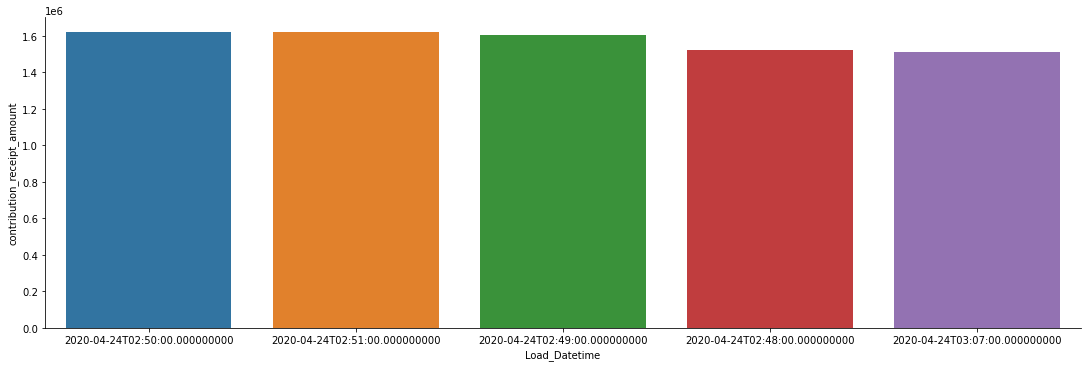

In [120]:
#bern['load_date'].head()
bern['Load_Datetime'] = pd.to_datetime(bern['load_date'])


ldt = bern.resample('T', on='Load_Datetime').contribution_receipt_amount.sum().reset_index()
ldt.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
ldt

ttt = ldt[:5]

ttt
ttx = sns.catplot(x='Load_Datetime', y='contribution_receipt_amount', aspect=3, kind="bar", data=ttt)
#plt.title("Top Contributors' by Rate Over Time")
plt.show(ttx)

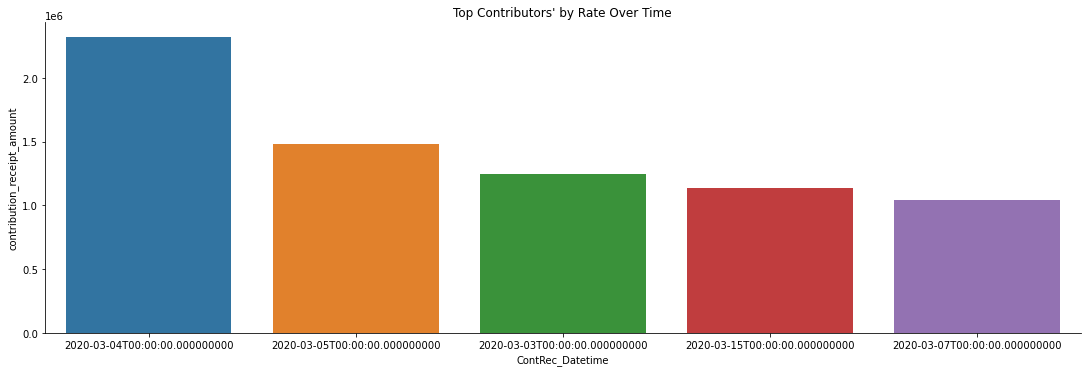

In [121]:
#bern['load_date'].head()
bern['ContRec_Datetime'] = pd.to_datetime(bern['contribution_receipt_date'])

dtime = (bern.resample('T', on='ContRec_Datetime').contribution_receipt_amount.sum()).reset_index()
dtime.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
dtime

top_ten_ = dtime[:5]

top_ten_
dtx = sns.catplot(x='ContRec_Datetime', y='contribution_receipt_amount', aspect=3, kind="bar", data=top_ten_)
plt.title("Top Contributors' by Rate Over Time")
plt.show(dtx)

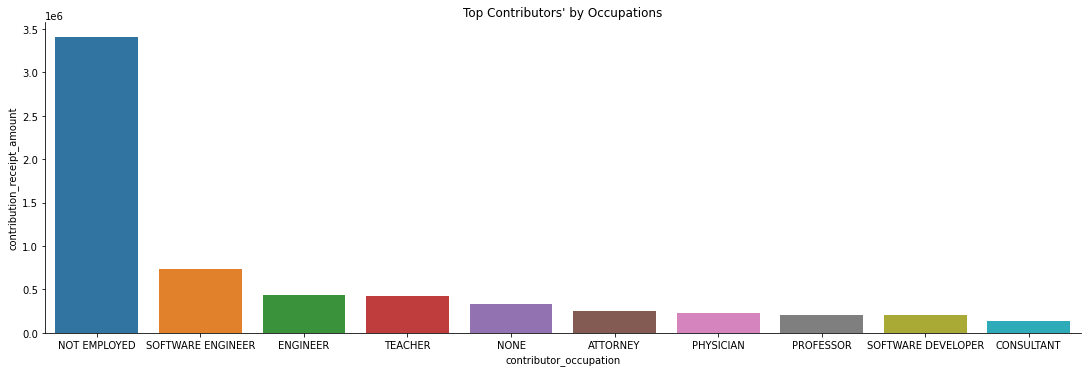

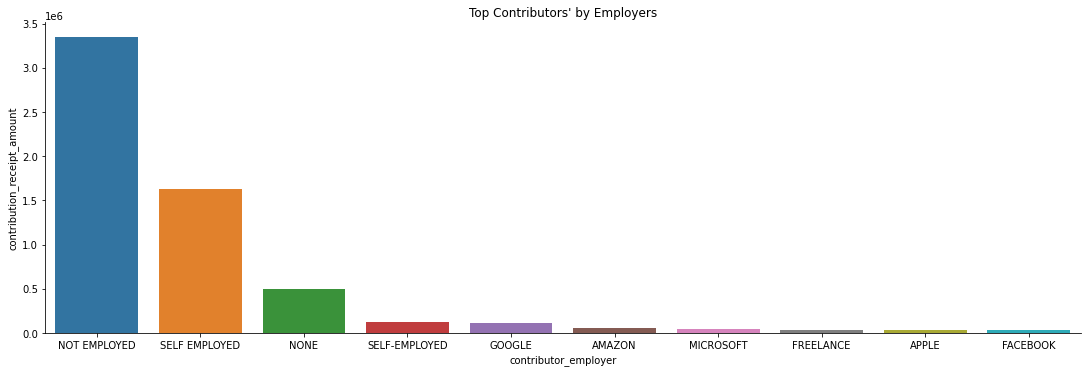

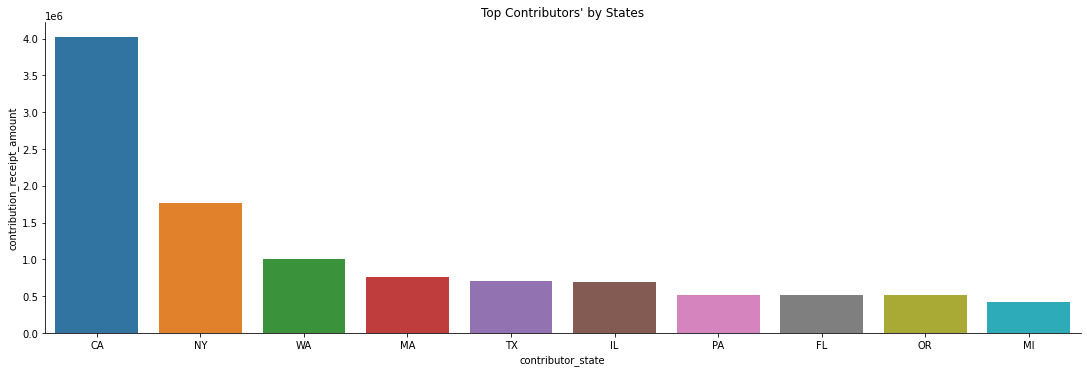

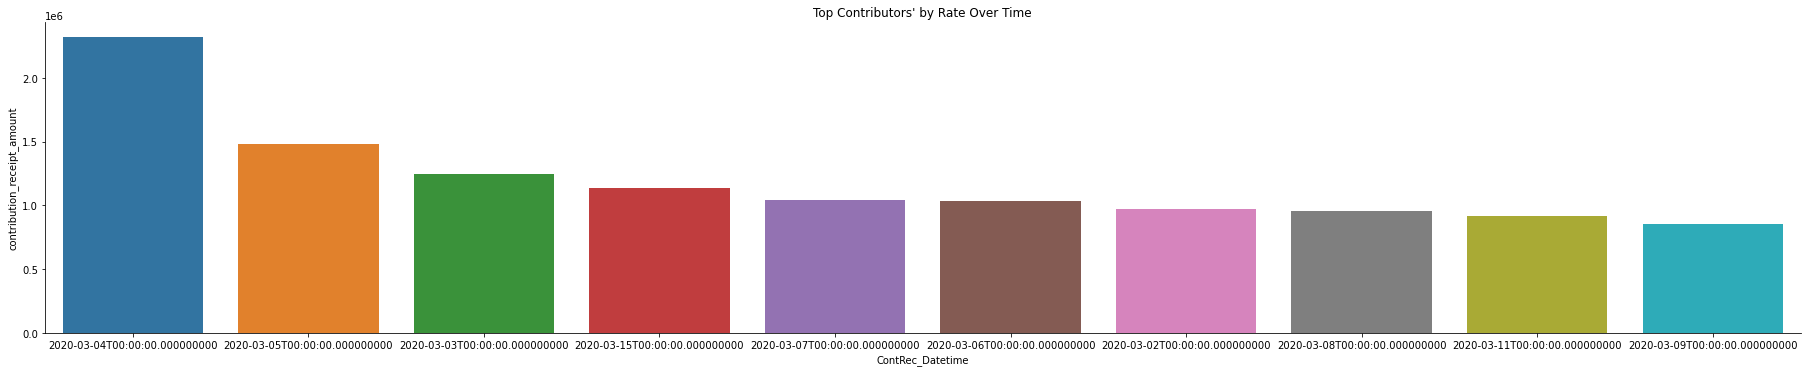

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bern = pd.read_csv('data/berniedata.csv')





########### Most Significant by Occupation

new_o = bern.groupby('contributor_occupation').agg({
    'contribution_receipt_amount': sum}).reset_index()

new_o.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
top_ten_occ = new_o[:10]

top_ten_occ
xx = sns.catplot(x='contributor_occupation', y='contribution_receipt_amount', aspect=3, kind="bar", data=top_ten_occ)
plt.title("Top Contributors' by Occupations")
plt.show(xx)




########### Most Significant by Employer

new_e = bern.groupby('contributor_employer').agg({
    'contribution_receipt_amount': sum}).reset_index()

new_e.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
top_ten_emp = new_e[:10]

top_ten_emp
yx = sns.catplot(x='contributor_employer', y='contribution_receipt_amount', aspect=3, kind="bar", data=top_ten_emp)
plt.title("Top Contributors' by Employers")
plt.show(yx)




########### Most Significant by State

new_s = bern.groupby('contributor_state').agg({
    'contribution_receipt_amount': sum}).reset_index()

new_s.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
top_ten_sta = new_s[:10]

top_ten_sta
zx = sns.catplot(x='contributor_state', y='contribution_receipt_amount', aspect=3, kind="bar", data=top_ten_sta)
plt.title("Top Contributors' by States")
plt.show(zx)




########### Most Significant by Rate over Time

bern['ContRec_Datetime'] = pd.to_datetime(bern['contribution_receipt_date'])

dtime = (bern.resample('T', on='ContRec_Datetime').contribution_receipt_amount.sum()).reset_index()
dtime.sort_values(by=['contribution_receipt_amount'],ascending=False, inplace=True)
dtime

top_ten_ = dtime[:10]

top_ten_
dtx = sns.catplot(x='ContRec_Datetime', y='contribution_receipt_amount', aspect=5, kind="bar", data=top_ten_)
plt.title("Top Contributors' by Rate Over Time")
plt.show(dtx)

In [9]:
bernpulls = bern[['contributor_occupation','contributor_employer','contributor_state']]
bernpulls.columns = ['occupation', 'employer', 'state']

bernpulls.head()

,occupation,employer,state
0,LISTING COORDINATOR,CBRE ALBANY,NY
1,NOT EMPLOYED,NOT EMPLOYED,CO
2,TEACHER,RICHARDSON ISD,TX
3,ELECTRICAL DESIGNER,REYES ENGINEERING,OR
4,STUDENT,RUTGERS,NJ


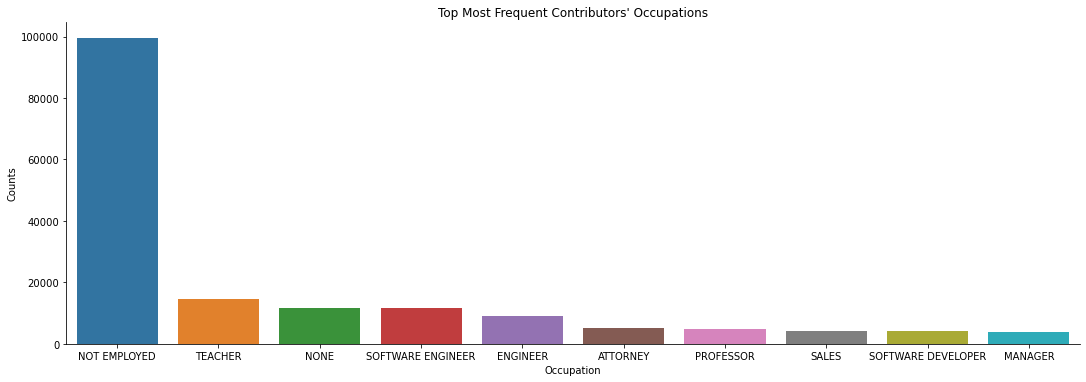

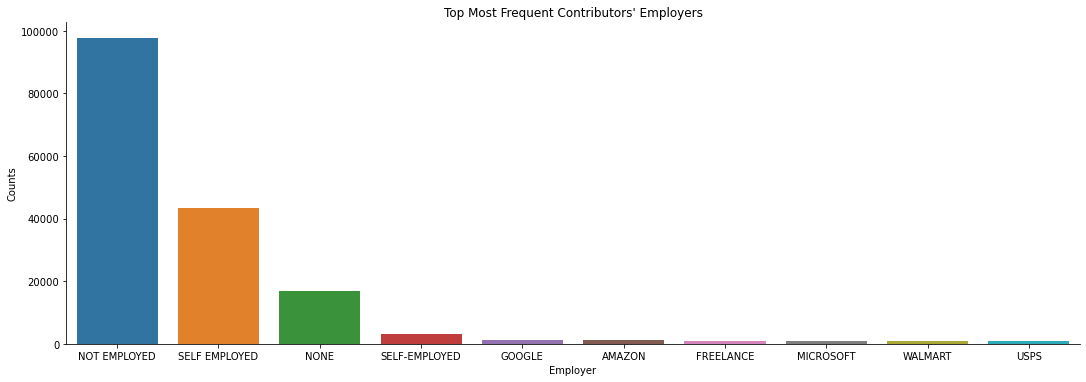

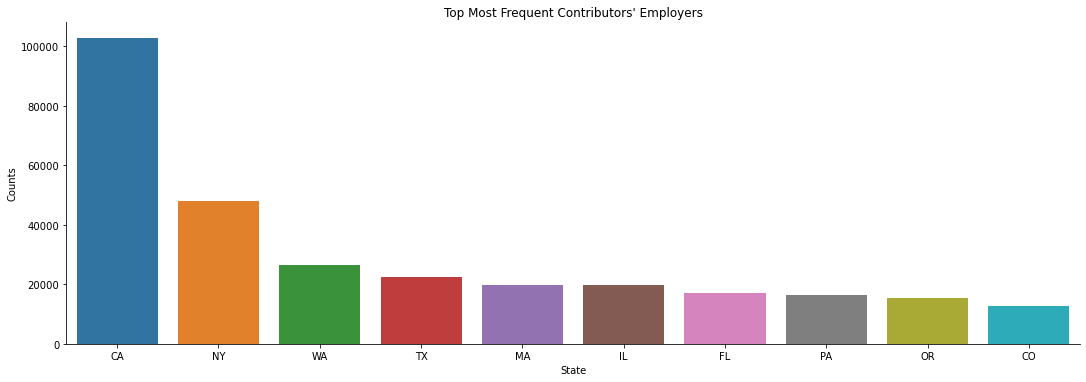

In [46]:
#occupations
top_occupations = bernpulls['occupation'].value_counts()[:10].rename_axis('Occupation').reset_index(name='Counts')
top_occupations

ax = sns.catplot(x='Occupation', y='Counts', aspect=3, kind="bar", data=top_occupations)
plt.title("Top Most Frequent Contributors' Occupations")
plt.show(ax)



#employers
top_employers = bernpulls['employer'].value_counts()[:10].rename_axis('Employer').reset_index(name='Counts')
top_employers

bx = sns.catplot(x='Employer', y='Counts', aspect=3, kind="bar", data=top_employers)
plt.title("Top Most Frequent Contributors' Employers")
plt.show(bx)



#states
top_states = bernpulls['state'].value_counts()[:10].rename_axis('State').reset_index(name='Counts')
top_states

cx = sns.catplot(x='State', y='Counts', aspect=3, kind="bar", data=top_states)
plt.title("Top Most Frequent Contributors' Employers")
plt.show(cx)